In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data processing and exploration

In [ ]:
# file = tf.keras.utils # Google Drive 연동으로 필요없을 수도...
raw_df = pd.read_csv('gdrive/MyDrive/ATAA/data_df.csv')
raw_df.head()

In [ ]:
raw_df[raw_df.duplicated(subset="ID")]

In [ ]:
# We don't want the 'Unnamed: 0', 'ID', 'Ht', 'Wt' column.
raw_df1 = raw_df.drop(['Unnamed: 0', 'ID', 'Ht', 'Wt'], axis=1)

In [ ]:
raw_df1.shape

In [ ]:
print(raw_df1.info())

In [ ]:
print((raw_df1.isnull().mean() * 100).to_string())

In [ ]:
print(raw_df1.count())

In [ ]:
num_rows = raw_df1.shape[0]
num_missing = num_rows - raw_df1.count()
print(num_missing)

In [ ]:
raw_df1.shape

In [ ]:
print(np.count_nonzero(raw_df1['Aneurysm'].isnull()))

In [ ]:
raw_df1.describe()  # 17개 변수 (16개 feature, 1개 label), samples 수 : 18382

In [ ]:
raw_df1[['LDL','glc','Cr','CRP','Age','BSA','BMI','Waist','SBP','DBP','HR']].describe()

### Examine the class label imbalance

Let's look at the dataset imbalance:

In [ ]:
neg, pos = np.bincount(raw_df1['Aneurysm'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

This shows the small fraction of positive samples.

In [ ]:
cleaned_df = raw_df1.copy()

In [ ]:
data = cleaned_df.drop(['Aneurysm'], axis=1)
target =cleaned_df['Aneurysm']

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df, train_target, test_target = train_test_split(data, target, test_size=0.2, stratify=target, random_state=99)

In [ ]:
print(train_df.info())

# Imputation and Standardization
To handle the missing data, we obtaineed the mean value of continuous variables or the mode value of categorical variables from the training data set for each feature and used the missing data with the mean or mode value in both the training and testing data sets.
We then performed standardization of the data set.

In [ ]:
mean_LDL = round(train_df['LDL'].mean(axis=0))  # LDL 열의 평균 계산(NaN값 제외)
print(mean_LDL)
mean_glc = round(train_df['glc'].mean(axis=0))  # glc 열의 평균 계산(NaN값 제외)
print(mean_glc)
mean_Cr = round(train_df['Cr'].mean(axis=0))  # Cr 열의 평균 계산(NaN값 제외)
print(mean_Cr)
mean_CRP = round(train_df['CRP'].mean(axis=0))  # CRP 열의 평균 계산(NaN값 제외)
print(mean_CRP)
mean_Age = round(train_df['Age'].mean(axis=0))  # Age 열의 평균 계산(NaN값 제외)
print(mean_Age)
mean_BSA = round(train_df['BSA'].mean(axis=0))  # BSA 열의 평균 계산(NaN값 제외)
print(mean_BSA)
mean_BMI = round(train_df['BMI'].mean(axis=0))  # BMI 열의 평균 계산(NaN값 제외)
print(mean_BMI)
mean_Waist = round(train_df['Waist'].mean(axis=0))  # Waist 열의 평균 계산(NaN값 제외)
print(mean_Waist)
mean_SBP = round(train_df['SBP'].mean(axis=0))  # SBP 열의 평균 계산(NaN값 제외)
print(mean_SBP)
mean_DBP = round(train_df['DBP'].mean(axis=0))  # DBP 열의 평균 계산(NaN값 제외)
print(mean_DBP)
mean_HR = round(train_df['HR'].mean(axis=0))  # HR 열의 평균 계산(NaN값 제외)
print(mean_HR)

In [ ]:
most_freq_Sex = train_df['Sex'].value_counts(dropna=False).idxmax()
print("most_freq_Sex : ", most_freq_Sex)
most_freq_DM = train_df['DM'].value_counts(dropna=False).idxmax()
print("most_freq_DM : ", most_freq_DM)
most_freq_HTN = train_df['HTN'].value_counts(dropna=False).idxmax()
print("most_freq_HTN : ", most_freq_HTN)
most_freq_DL = train_df['DL'].value_counts(dropna=False).idxmax()
print("most_freq_DL : ", most_freq_DL)
most_freq_Smoke = train_df['Smoke'].value_counts(dropna=False).idxmax()
print("most_freq_Smoke : ", most_freq_Smoke)

In [ ]:
train_df['LDL'].fillna(mean_LDL, inplace=True)
train_df['glc'].fillna(mean_glc, inplace=True)
train_df['Cr'].fillna(mean_Cr, inplace=True)
train_df['CRP'].fillna(mean_CRP, inplace=True)
train_df['Age'].fillna(mean_Age, inplace=True)
train_df['BSA'].fillna(mean_BSA, inplace=True)
train_df['BMI'].fillna(mean_BMI, inplace=True)
train_df['Waist'].fillna(mean_Waist, inplace=True)
train_df['SBP'].fillna(mean_SBP, inplace=True)
train_df['DBP'].fillna(mean_DBP, inplace=True)
train_df['HR'].fillna(mean_HR, inplace=True)

In [ ]:
test_df['LDL'].fillna(mean_LDL, inplace=True)
test_df['glc'].fillna(mean_glc, inplace=True)
test_df['Cr'].fillna(mean_Cr, inplace=True)
test_df['CRP'].fillna(mean_CRP, inplace=True)
test_df['Age'].fillna(mean_Age, inplace=True)
test_df['BSA'].fillna(mean_BSA, inplace=True)
test_df['BMI'].fillna(mean_BMI, inplace=True)
test_df['Waist'].fillna(mean_Waist, inplace=True)
test_df['SBP'].fillna(mean_SBP, inplace=True)
test_df['DBP'].fillna(mean_DBP, inplace=True)
test_df['HR'].fillna(mean_HR, inplace=True)

In [ ]:
train_df['Sex'].fillna(most_freq_Sex, inplace=True)
train_df['DM'].fillna(most_freq_DM, inplace=True)
train_df['HTN'].fillna(most_freq_HTN, inplace=True)
train_df['DL'].fillna(most_freq_DL, inplace=True)
train_df['Smoke'].fillna(most_freq_Smoke, inplace=True)

In [ ]:
test_df['Sex'].fillna(most_freq_Sex, inplace=True)
test_df['DM'].fillna(most_freq_DM, inplace=True)
test_df['HTN'].fillna(most_freq_HTN, inplace=True)
test_df['DL'].fillna(most_freq_DL, inplace=True)
test_df['Smoke'].fillna(most_freq_Smoke, inplace=True)

In [ ]:
train_df.head()

In [ ]:
train_df.to_csv("gdrive/MyDrive/ATAA/train_df.csv", mode='w')
test_df.to_csv("gdrive/MyDrive/ATAA/test_df.csv", mode='w')
train_target.to_csv("gdrive/MyDrive/ATAA/train_target.csv", mode='w')
test_target.to_csv("gdrive/MyDrive/ATAA/test_target.csv", mode='w')

In [ ]:
# Feature number choice
train_df = train_df[["Age","HTN","Waist","Cr","Smoke","BMI","CRP","SBP","DL","DBP","BSA","Sex","HR","LDL","glc"]]
test_df = test_df[["Age","HTN","Waist","Cr","Smoke","BMI","CRP","SBP","DL","DBP","BSA","Sex","HR","LDL","glc"]]

In [ ]:
test_df.head(20)

In [ ]:
print((test_df.isnull().mean() * 100).to_string())

In [ ]:
print((train_target.to_frame().isnull().mean() * 100).to_string())

In [ ]:
print(train_target.value_counts(dropna=False))
print(train_target.shape)

In [ ]:
train_df, val_df, train_target, val_target = train_test_split(train_df, train_target, test_size=0.25, stratify=train_target, random_state=99)

# Form np arrays of labels and features.
train_labels = np.array(train_target)
bool_train_labels = train_labels != 0
val_labels = np.array(val_target)
test_labels = np.array(test_target)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


## Define the model and metrics

Define a function that creates a  5-layer DNN (deep neural network) with an input layer, 3 FC layers as hidden layers, dropout layers to reduce overfitting, and an output sigmoid layer that returns the probability of a ascending thoracic aorta aneurysm: 

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  input = keras.layers.Input(shape=(train_features.shape[-1],), name='Input')
  x = keras.layers.Dense(30, activation='relu', name='FC1')(input)
  x = keras.layers.Dropout(0.5, name='DO1')(x)
  x = keras.layers.Dense(16, activation='relu', name='FC2')(x)
  x = keras.layers.Dropout(0.5, name='DO2')(x)
  x = keras.layers.Dense(8, activation='relu', name='FC3')(x)
  x = keras.layers.Dropout(0.5, name='DO3')(x)
  output = keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias, name='Output')(x)

  model = keras.models.Model(inputs=input, outputs=output)
  
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

## Baseline model

In [ ]:
EPOCHS = 500
BATCH_SIZE = 128

earlyStopping = keras.callbacks.EarlyStopping(
    monitor='val_prc',
    mode='max',
    verbose=1,
    patience=30)

In [ ]:
model = make_model()
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 15)]              0         
                                                                 
 FC1 (Dense)                 (None, 30)                480       
                                                                 
 DO1 (Dropout)               (None, 30)                0         
                                                                 
 FC2 (Dense)                 (None, 16)                496       
                                                                 
 DO2 (Dropout)               (None, 16)                0         
                                                                 
 FC3 (Dense)                 (None, 18)                306       
                                                                 
 DO3 (Dropout)               (None, 18)                0  

Test run the model:

In [ ]:
model.predict(train_features[:10])

array([[0.861308  ],
       [0.87822944],
       [0.83107865],
       [0.8518421 ],
       [0.88769966],
       [0.86598885],
       [0.8729413 ],
       [0.886042  ],
       [0.8526174 ],
       [0.877069  ]], dtype=float32)

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('ATAA Detected (True Negatives): ', cm[0][0])
  print('ATAA Incorrectly Detected (False Positives): ', cm[0][1])
  print('ATAA Missed (False Negatives): ', cm[1][0])
  print('ATAA Detected (True Positives): ', cm[1][1])
  print('Total ATAA: ', np.sum(cm[1]))

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(train_features, train_labels)

### Train on the resampled data using smote

Now try training the model with the resampled data set.

The data was balanced by smote algorithm.

Balancing the dataset by smote:

In [ ]:
smote_model = make_model()
smote_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model.layers[-1] 
output_layer.bias.assign([0])

path = 'smote_best_model.h5'

modelCheckpoint = keras.callbacks.ModelCheckpoint(
    filepath=path,
    monitor='val_loss',
    save_best_only=True)

# 복잡한 모델에서는 patience=10에서 30번까지로 설정

smote_history = smote_model.fit(
    X_smote,
    y_smote,
    # These are not real epochs
    #steps_per_epoch=len(X_smote)/BATCH_SIZE,
    steps_per_epoch = 160,
    batch_size=BATCH_SIZE,
    epochs=10*EPOCHS,
    callbacks=[modelCheckpoint, earlyStopping],
    validation_data=(val_features, val_labels)) 

Epoch 1/5000
160/160 [==============================] - 4s 12ms/step - loss: 0.7035 - tp: 5761.0000 - fp: 5328.0000 - tn: 8358.0000 - fn: 4710.0000 - accuracy: 0.5845 - precision: 0.5195 - recall: 0.5502 - auc: 0.6287 - prc: 0.5042 - val_loss: 0.5745 - val_tp: 155.0000 - val_fp: 979.0000 - val_tn: 2468.0000 - val_fn: 75.0000 - val_accuracy: 0.7134 - val_precision: 0.1367 - val_recall: 0.6739 - val_auc: 0.7664 - val_prc: 0.2126
Epoch 2/5000
160/160 [==============================] - 1s 7ms/step - loss: 0.6042 - tp: 7502.0000 - fp: 4096.0000 - tn: 6107.0000 - fn: 2719.0000 - accuracy: 0.6663 - precision: 0.6468 - recall: 0.7340 - auc: 0.7292 - prc: 0.7006 - val_loss: 0.4782 - val_tp: 164.0000 - val_fp: 1079.0000 - val_tn: 2368.0000 - val_fn: 66.0000 - val_accuracy: 0.6886 - val_precision: 0.1319 - val_recall: 0.7130 - val_auc: 0.7931 - val_prc: 0.2485
Epoch 3/5000
160/160 [==============================] - 1s 7ms/step - loss: 0.5443 - tp: 8493.0000 - fp: 3663.0000 - tn: 6565.0000 - fn: 1

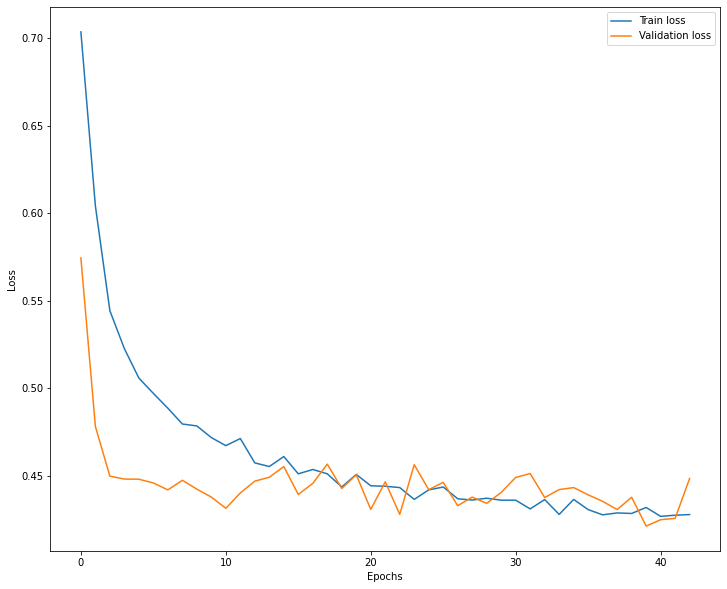

In [ ]:
plt.plot(smote_history.history['loss'], label='Train loss')
plt.plot(smote_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Re-train

In [ ]:
smote_model = make_model()
smote_model.load_weights('smote_best_model.h5')

### Evaluate metrics

In [ ]:
train_predictions_smote = smote_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote = smote_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.41649118065834045
tp :  159.0
fp :  652.0
tn :  2796.0
fn :  70.0
accuracy :  0.8036442995071411
precision :  0.19605425000190735
recall :  0.6943231225013733
auc :  0.8351294994354248
prc :  0.28980758786201477

ATAA Detected (True Negatives):  2796
ATAA Incorrectly Detected (False Positives):  652
ATAA Missed (False Negatives):  70
ATAA Detected (True Positives):  159
Total ATAA:  229


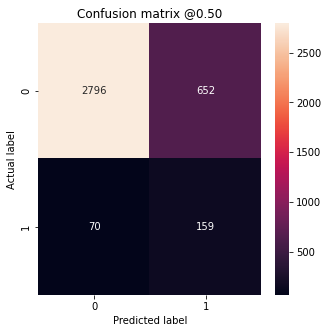

In [ ]:
smote_results = smote_model.evaluate(test_features, test_labels,
                                             batch_size=2*BATCH_SIZE, verbose=0)
for name, value in zip(smote_model.metrics_names, smote_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote)

In [ ]:
train_prediction = pd.DataFrame(train_predictions_smote)
train_prediction
test_prediction = pd.DataFrame(test_predictions_smote)
test_prediction

,0
0,0.332399
1,0.292454
2,0.000965
3,0.003072
4,0.364755
...,...
3672,0.000090
3673,0.814240
3674,0.002198
3675,0.395746


### Plot the ROC

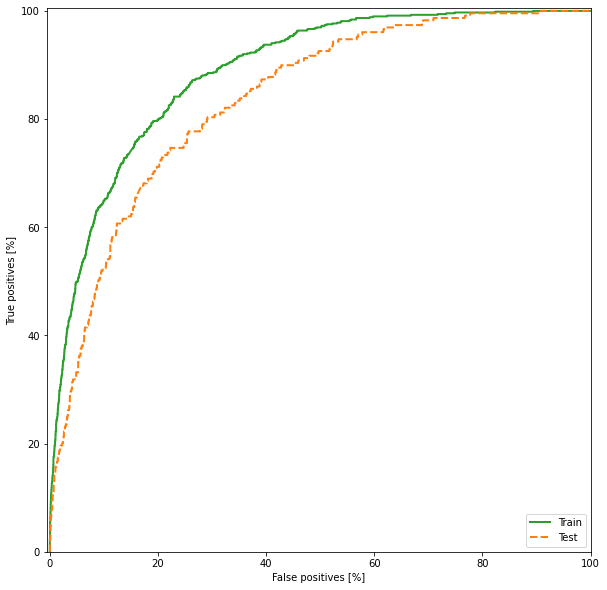

In [ ]:
plot_roc("Train", train_labels, train_predictions_smote, color=colors[2])
plot_roc("Test", test_labels, test_predictions_smote, color=colors[1], linestyle='--')
plt.legend(loc='lower right');
plt.grid(False)

plt.savefig('myfigure.pdf', transparent = True)